PAIRING PACE and BTS

Following tutorial on hackweek page

In [1]:
# data point
time = "2025-04-09"
lat = 30.0
lon = -89.0

In [20]:
import earthaccess
auth = earthaccess.login(persist=True)

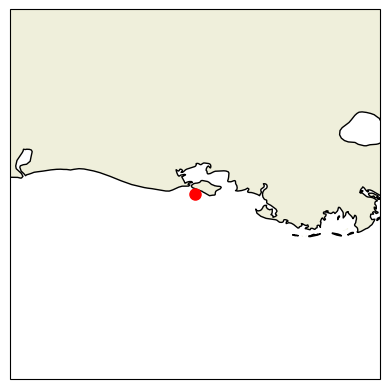

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.plot(lon, lat, "ro", markersize=8)
ax.set_extent([lon-2, lon+2, lat-2, lat+2])
plt.show()

In [22]:
import earthaccess
import xarray as xr

# Login
auth = earthaccess.login()
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_RRS",
    temporal=(time, time),
    granule_name="*.DAY.*.4km.*"
)

fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
ds = xr.open_dataset(fileset[0])
ds

<xarray.Dataset> Size: 26GB
Dimensions:     (lat: 4320, lon: 8640, wavelength: 172, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * wavelength  (wavelength) float64 1kB 346.0 348.0 351.0 ... 714.0 717.0 719.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float32 26GB ...
    palette     (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20250409.L3m.DAY.RRS.V3_1.Rrs...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/3.1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         3982396
    data_minimum:                      -0.009998
    data_maximum:                      0.09329285

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.72 μs


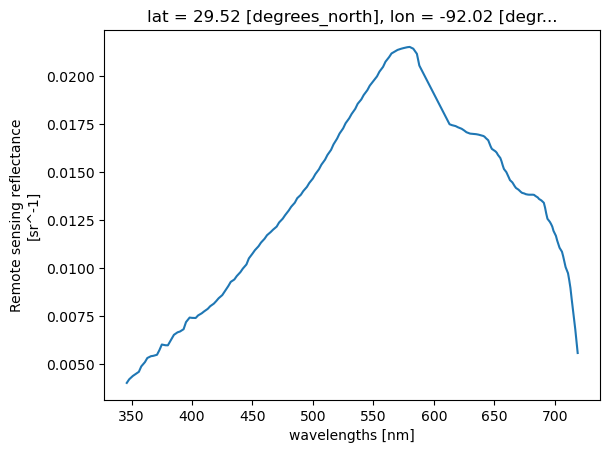

In [24]:
# See how fast this goes
%time

# Quick look at the water Reflectance 
pt = ds["Rrs"].sel(lat=lat, lon=lon, method="nearest")
pt.plot.line(x="wavelength")

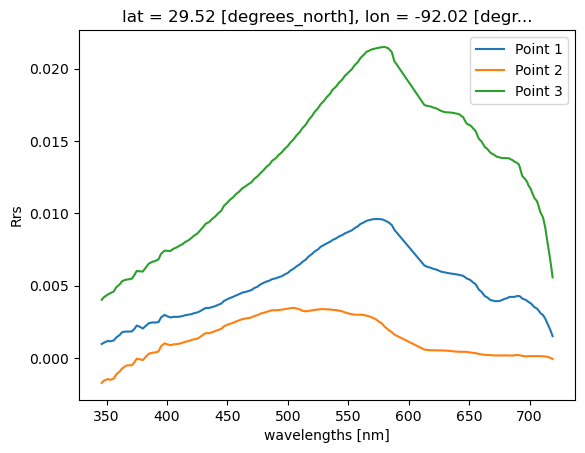

In [25]:
# Example list of points
points = [(30.00, -89.00), (30.30, -87.00), (29.5, -92.00)]

for i, (lat, lon) in enumerate(points, start=1):
    pt = ds["Rrs"].sel(lat=lat, lon=lon, method="nearest")
    pt.plot.line(x="wavelength", label=f"Point {i}")   
plt.ylabel("Rrs")
plt.legend()
plt.show()

In [26]:
import os
#Finding the current directory
os.getcwd()

'/home/jovyan/2026-proj-Trawling4PACE/data'

In [27]:
#listing what is in the directory
os.listdir()

['22560_NEFSCFallFisheriesIndependentBottomTrawlData.zip',
 '22561_NEFSCSpringFisheriesIndependentBottomTrawlData.zip',
 '22561_UNION_FSCS_SVSTA.csv',
 'data.csv',
 'filtered_bts.csv',
 'Test_PACE_RRS_1D_centerpixel.csv',
 '.ipynb_checkpoints',
 'TEST_PACE_RRS_1D_3x3mean.csv']

In [29]:
#changing directory
os.chdir("/home/jovyan/2026-proj-Trawling4PACE/data")

In [30]:
import pandas as pd

# Load ship data
track_df = pd.read_csv("filtered_bts.csv")
#2026-proj-Trawling4PACE/data/filtered_bts.csv
print(track_df.columns.tolist())
track_df

['Unnamed: 0', 'CRUISE6', 'CRUISE', 'STRATUM', 'TOW', 'STATION', 'STATUS_CODE', 'ID', 'STATYPE', 'HAUL', 'GEARCOND', 'SHG', 'TYPE_CODE', 'TYPE_COMMENT', 'OPERATION_CODE', 'OPERATION_COMMENT', 'GEAR_CODE', 'GEAR_COMMENT', 'ACQUISITION_CODE', 'ACQUISITION_COMMENT', 'TOGA', 'AREA', 'SVVESSEL', 'CRUNUM', 'SVGEAR', 'BEGIN_EST_TOWDATE', 'BEING_EST_TOWDATE', 'BEGIN_GMT_TOWDATE', 'BEGIN_GMT_TOWDATE_1', 'EST_YEAR', 'EST_MONTH', 'EST_DAY', 'EST_JULIAN_DAY', 'EST_TIME', 'GMT_YEAR', 'GMT_MONTH', 'GMT_DAY', 'GMT_JULIAN_DAY', 'GMT_TIME', 'TOWDUR', 'SETDEPTH', 'ENDDEPTH', 'MINDEPTH', 'MAXDEPTH', 'AVGDEPTH', 'BEGEKVLOG', 'ENDEKVLOG', 'BEGLAT', 'BEGLON', 'ENDLAT', 'ENDLON', 'DECDEG_BEGLAT', 'DECDEG_BEGLON', 'DECDEG_ENDLAT', 'DECDEG_ENDLON', 'LORS1', 'LORE1', 'LORS2', 'LORE2', 'CABLE', 'PITCH', 'HEADING', 'COURSE', 'RPM', 'DOPDISTB', 'DOPDISTW', 'DESSPEED', 'GEARID', 'DOORID', 'OTHGEAR', 'AIRTEMP', 'CLOUD', 'BAROPRESS', 'WINDDIR', 'WINDSP', 'WEATHER', 'WAVEHGT', 'SWELLDIR', 'SWELLHGT', 'BKTTEMP', 'TRASH

,Unnamed: 0,CRUISE6,CRUISE,STRATUM,TOW,STATION,STATUS_CODE,ID,STATYPE,HAUL,...,BOTSPEED,WATCH_CHIEF_COMMENTS,STATION_COMMENTS,HABITAT_COMMENTS,SVSPP,CATCHSEX,EXPCATCHNUM,EXPCATCHWT,SCIENTIFIC_NAME,CATCH_COMMENT
0,274978,202402,202402,1010,1,266,10,202402010100010266,1.0,1.0,...,3.0,NaN,NaN,NaN,23.0,0.0,14.0,21.784,Leucoraja ocellata (winter skate),NaN
1,274979,202402,202402,1010,1,266,10,202402010100010266,1.0,1.0,...,3.0,NaN,NaN,NaN,26.0,0.0,177.0,82.533,Leucoraja erinacea (little skate),NaN
2,274980,202402,202402,1010,1,266,10,202402010100010266,1.0,1.0,...,3.0,NaN,NaN,NaN,72.0,0.0,142.0,1.762,Merluccius bilinearis (silver hake),NaN
3,274981,202402,202402,1010,1,266,10,202402010100010266,1.0,1.0,...,3.0,NaN,NaN,NaN,103.0,0.0,19.0,12.075,Paralichthys dentatus (summer flounder),NaN
4,274982,202402,202402,1010,1,266,10,202402010100010266,1.0,1.0,...,3.0,NaN,NaN,NaN,104.0,0.0,3.0,0.301,Hippoglossina oblonga (fourspot flounder),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,340699,202404,202404,8520,1,203,10,202404085200010203,1.0,1.0,...,3.0,NaN,+25m wire out; +25m wire out; +25m wire out; +...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14503,340700,202404,202404,8520,2,190,10,202404085200020190,1.0,1.0,...,2.8,NaN,Stream Net was pressed approximately 1 minute ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14504,340702,202404,202404,8530,1,205,10,202404085300010205,1.0,1.0,...,2.9,NaN,"+100m wire out; plus 150m additional wire, tot...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
14505,340703,202404,202404,8530,2,208,10,202404085300020208,1.0,1.0,...,3.0,NaN,add 100 m wire; add 100m wire; add 100m wire; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
track_df['EXPCATCHNUM']

0         14.0
1        177.0
2        142.0
3         19.0
4          3.0
         ...  
14502      NaN
14503      NaN
14504      NaN
14505      NaN
14506      NaN
Name: EXPCATCHNUM, Length: 14507, dtype: float64

In [32]:
track_df['BEGIN_EST_TOWDATE']

0        03/22/2024 01:43:58
1        03/22/2024 01:43:58
2        03/22/2024 01:43:58
3        03/22/2024 01:43:58
4        03/22/2024 01:43:58
                ...         
14502    09/19/2024 23:53:39
14503    09/19/2024 13:13:36
14504    09/20/2024 02:42:52
14505    09/20/2024 09:12:37
14506    09/20/2024 06:15:49
Name: BEGIN_EST_TOWDATE, Length: 14507, dtype: object

In [34]:
track_df['BEGIN_EST_TOWDATE'] = pd.to_datetime(track_df['BEGIN_EST_TOWDATE'])

# Convert to a date-only column (dtype: object of date objects)
track_df['BEGIN_EST_TOWDATE'] = track_df['BEGIN_EST_TOWDATE'].dt.date

print(track_df['BEGIN_EST_TOWDATE'])

0        2024-03-22
1        2024-03-22
2        2024-03-22
3        2024-03-22
4        2024-03-22
            ...    
14502    2024-09-19
14503    2024-09-19
14504    2024-09-20
14505    2024-09-20
14506    2024-09-20
Name: BEGIN_EST_TOWDATE, Length: 14507, dtype: object


In [14]:
track_df['BEGIN_EST_TOWDATE']

0        2024-03-22
1        2024-03-22
2        2024-03-22
3        2024-03-22
4        2024-03-22
            ...    
14502    2024-09-19
14503    2024-09-19
14504    2024-09-20
14505    2024-09-20
14506    2024-09-20
Name: BEGIN_EST_TOWDATE, Length: 14507, dtype: object

In [35]:
# Load the dates and find all unique instances
track_df["BEGIN_EST_TOWDATE"] = pd.to_datetime(track_df["BEGIN_EST_TOWDATE"])
unique_dates = track_df["BEGIN_EST_TOWDATE"].sort_values().unique()
print(f"Number of unique dates to extract: {len(unique_dates)}")

Number of unique dates to extract: 152


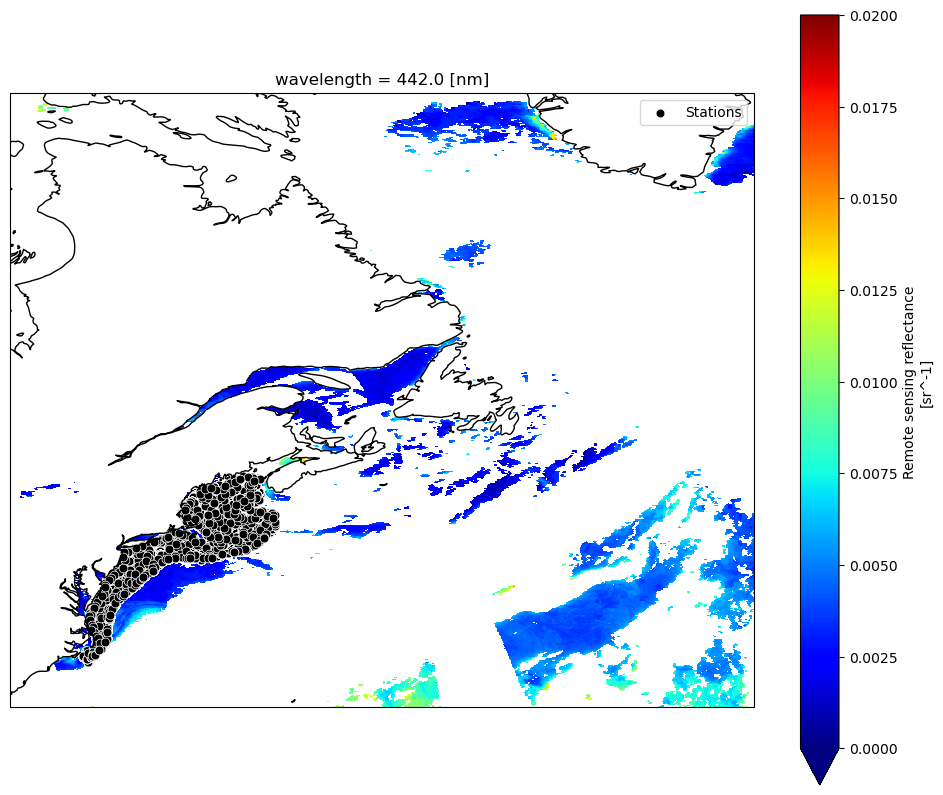

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Gulf bounds: (lat_max, lat_min, lon_min, lon_max)
ds_gulf = ds.sel(lat=slice(65, 32), lon=slice(-80, -40))
Rrs_443 = ds_gulf["Rrs"].sel(wavelength=443.0, method="nearest")

fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={"projection": ccrs.PlateCarree()})
Rrs_443.plot(ax=ax, cmap="jet", add_colorbar=True, vmin=0, vmax=0.02)
ax.coastlines(resolution="50m")
ax.scatter(track_df["DECDEG_BEGLON"], track_df["DECDEG_BEGLAT"], s=40, c="black", edgecolor="white", linewidth=0.5, label="Stations")
ax.legend(loc="upper right")
plt.show()

In [37]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

# Login
auth = earthaccess.login()
short_name = "PACE_OCI_L3M_RRS"
granule_name = "*.DAY.*.4km.*"
# Want 8D composites instead?
#granule_name = "*.8D.*.4km.*"
results_list = []

# Loop through unique dates
for date in tqdm(unique_dates, desc="Processing unique dates"):
    start = end = date.strftime("%Y-%m-%d")
    # Search & open files for exact date
    results = earthaccess.search_data(short_name=short_name, temporal=(start, end), granule_name=granule_name)
    fileset = earthaccess.open(results)

    for ea_file in fileset:  # iterate EarthAccessFile objects
        with xr.open_dataset(ea_file, engine="h5netcdf") as ds:
            points_today = track_df[track_df["BEGIN_EST_TOWDATE"] == date]
            
            for idx, row in tqdm(points_today.iterrows(), total=len(points_today), desc="Points in granule", leave=False):
                lat_center, lon_center = row["DECDEG_BEGLAT"], row["DECDEG_BEGLON"]
                rrs = ds["Rrs"].sel(lat=lat_center, lon=lon_center, method="nearest")
                result_row = {'Original_Index': idx, **row.to_dict()}
                result_row.update({f"Rrs_{int(wl)}": val for wl, val in rrs.to_series().items()})
                results_list.append(result_row)

# Combine results & save
if results_list:
    final_df = pd.DataFrame(results_list).set_index("Original_Index").sort_index()
    output_file = "Test_PACE_RRS_1D_centerpixel.csv"
    final_df.to_csv(output_file)
    print(f"CSV saved: {output_file}")
else:
    print("No data extracted. Check date ranges and data availability.")

Processing unique dates:   0%|          | 0/152 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   1%|          | 1/152 [00:11<29:56, 11.90s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   1%|▏         | 2/152 [00:21<26:58, 10.79s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   2%|▏         | 3/152 [00:31<25:57, 10.45s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   3%|▎         | 4/152 [00:42<25:35, 10.38s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   3%|▎         | 5/152 [00:51<24:49, 10.14s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   5%|▌         | 8/152 [01:16<20:11,  8.42s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   6%|▌         | 9/152 [01:26<21:17,  8.93s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   7%|▋         | 10/152 [01:36<22:15,  9.41s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   7%|▋         | 11/152 [01:48<23:43, 10.10s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   8%|▊         | 12/152 [02:01<26:02, 11.16s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   9%|▊         | 13/152 [02:11<25:00, 10.79s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   9%|▉         | 14/152 [02:23<25:40, 11.16s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  10%|▉         | 15/152 [02:36<26:23, 11.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  11%|█         | 16/152 [02:46<25:31, 11.26s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  11%|█         | 17/152 [02:56<24:08, 10.73s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  12%|█▏        | 18/152 [03:07<24:02, 10.76s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  12%|█▎        | 19/152 [03:16<22:59, 10.38s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  13%|█▎        | 20/152 [03:27<23:12, 10.55s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  14%|█▍        | 21/152 [03:38<23:25, 10.73s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  14%|█▍        | 22/152 [03:51<24:48, 11.45s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  15%|█▌        | 23/152 [04:03<24:45, 11.51s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  16%|█▌        | 24/152 [04:14<24:25, 11.45s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  16%|█▋        | 25/152 [04:25<23:38, 11.17s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  17%|█▋        | 26/152 [04:36<23:37, 11.25s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  18%|█▊        | 27/152 [04:46<22:44, 10.92s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  18%|█▊        | 28/152 [04:57<22:29, 10.88s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  19%|█▉        | 29/152 [05:10<23:20, 11.39s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  20%|█▉        | 30/152 [05:23<24:24, 12.01s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  20%|██        | 31/152 [05:34<23:45, 11.78s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  21%|██        | 32/152 [05:45<22:43, 11.36s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  22%|██▏       | 33/152 [05:57<22:48, 11.50s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  22%|██▏       | 34/152 [06:07<22:02, 11.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  23%|██▎       | 35/152 [06:20<22:39, 11.62s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  24%|██▎       | 36/152 [06:35<24:24, 12.63s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  24%|██▍       | 37/152 [06:48<24:37, 12.85s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  25%|██▌       | 38/152 [07:00<23:44, 12.49s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  26%|██▌       | 39/152 [07:11<22:58, 12.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  26%|██▋       | 40/152 [07:23<22:27, 12.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  27%|██▋       | 41/152 [07:36<22:41, 12.27s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  28%|██▊       | 42/152 [07:48<22:33, 12.30s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  28%|██▊       | 43/152 [07:59<21:37, 11.90s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  29%|██▉       | 44/152 [08:10<21:05, 11.72s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  30%|██▉       | 45/152 [08:22<20:42, 11.61s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  30%|███       | 46/152 [08:33<20:07, 11.39s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  31%|███       | 47/152 [08:44<20:05, 11.48s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  32%|███▏      | 48/152 [08:54<19:03, 10.99s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  32%|███▏      | 49/152 [09:06<19:12, 11.19s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  33%|███▎      | 50/152 [09:16<18:22, 10.81s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  34%|███▎      | 51/152 [09:25<17:14, 10.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  34%|███▍      | 52/152 [09:35<17:08, 10.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  35%|███▍      | 53/152 [09:43<15:49,  9.60s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  37%|███▋      | 56/152 [10:08<13:49,  8.64s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  38%|███▊      | 57/152 [10:16<13:42,  8.66s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  38%|███▊      | 58/152 [10:25<13:43,  8.76s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  39%|███▉      | 59/152 [10:35<13:53,  8.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  39%|███▉      | 60/152 [10:45<14:14,  9.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  40%|████      | 61/152 [10:54<13:54,  9.17s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  41%|████      | 62/152 [11:03<13:54,  9.27s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  41%|████▏     | 63/152 [11:12<13:19,  8.98s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  42%|████▏     | 64/152 [11:20<13:06,  8.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  43%|████▎     | 65/152 [11:30<13:08,  9.07s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  43%|████▎     | 66/152 [11:39<13:06,  9.15s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  44%|████▍     | 67/152 [11:50<13:32,  9.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  45%|████▍     | 68/152 [11:57<12:38,  9.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  45%|████▌     | 69/152 [12:06<12:25,  8.98s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  46%|████▌     | 70/152 [12:15<12:11,  8.93s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  47%|████▋     | 71/152 [12:23<11:46,  8.73s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  47%|████▋     | 72/152 [12:32<11:31,  8.64s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  48%|████▊     | 73/152 [12:40<11:16,  8.57s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  49%|████▊     | 74/152 [12:49<11:04,  8.51s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  49%|████▉     | 75/152 [12:58<11:11,  8.72s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  50%|█████     | 76/152 [13:06<10:57,  8.65s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  51%|█████     | 77/152 [13:15<10:41,  8.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  51%|█████▏    | 78/152 [13:24<10:45,  8.73s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  52%|█████▏    | 79/152 [13:33<10:41,  8.78s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  53%|█████▎    | 80/152 [13:40<09:52,  8.23s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  53%|█████▎    | 81/152 [13:48<09:45,  8.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  55%|█████▍    | 83/152 [14:04<09:26,  8.22s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  55%|█████▌    | 84/152 [14:13<09:24,  8.30s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  56%|█████▌    | 85/152 [14:21<09:06,  8.15s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  57%|█████▋    | 86/152 [14:30<09:22,  8.52s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  57%|█████▋    | 87/152 [14:38<09:09,  8.46s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  58%|█████▊    | 88/152 [14:48<09:26,  8.86s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  59%|█████▊    | 89/152 [14:56<09:07,  8.68s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  59%|█████▉    | 90/152 [15:04<08:41,  8.41s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  60%|█████▉    | 91/152 [15:13<08:41,  8.54s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  61%|██████    | 92/152 [15:21<08:17,  8.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  61%|██████    | 93/152 [15:28<07:56,  8.07s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  62%|██████▏   | 94/152 [15:38<08:18,  8.59s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  62%|██████▎   | 95/152 [15:47<08:18,  8.75s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  63%|██████▎   | 96/152 [15:56<08:04,  8.66s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  64%|██████▍   | 97/152 [16:03<07:38,  8.34s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  64%|██████▍   | 98/152 [16:12<07:29,  8.32s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  65%|██████▌   | 99/152 [16:20<07:28,  8.47s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  66%|██████▌   | 100/152 [16:29<07:22,  8.50s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  66%|██████▋   | 101/152 [16:38<07:16,  8.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  67%|██████▋   | 102/152 [16:47<07:20,  8.81s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  68%|██████▊   | 103/152 [16:57<07:22,  9.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  68%|██████▊   | 104/152 [17:08<07:51,  9.82s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  69%|██████▉   | 105/152 [17:21<08:22, 10.70s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  70%|██████▉   | 106/152 [17:32<08:20, 10.88s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  70%|███████   | 107/152 [17:45<08:27, 11.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  71%|███████   | 108/152 [17:56<08:20, 11.38s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  72%|███████▏  | 109/152 [18:07<08:01, 11.19s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  72%|███████▏  | 110/152 [18:19<07:57, 11.37s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  73%|███████▎  | 111/152 [18:29<07:37, 11.17s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  74%|███████▎  | 112/152 [18:38<06:54, 10.36s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  74%|███████▍  | 113/152 [18:48<06:41, 10.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  75%|███████▌  | 114/152 [19:01<06:56, 10.97s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  76%|███████▌  | 115/152 [19:12<06:53, 11.18s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  76%|███████▋  | 116/152 [19:23<06:33, 10.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  77%|███████▋  | 117/152 [19:33<06:13, 10.68s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  78%|███████▊  | 118/152 [19:41<05:43, 10.10s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  78%|███████▊  | 119/152 [19:49<05:09,  9.39s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  79%|███████▉  | 120/152 [20:00<05:16,  9.88s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  80%|███████▉  | 121/152 [20:11<05:13, 10.13s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  80%|████████  | 122/152 [20:21<05:06, 10.23s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  81%|████████  | 123/152 [20:32<05:04, 10.48s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  82%|████████▏ | 124/152 [20:44<05:00, 10.74s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  82%|████████▏ | 125/152 [20:53<04:39, 10.35s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  83%|████████▎ | 126/152 [21:05<04:36, 10.65s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  84%|████████▎ | 127/152 [21:15<04:23, 10.52s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  84%|████████▍ | 128/152 [21:26<04:20, 10.84s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  85%|████████▍ | 129/152 [21:37<04:04, 10.65s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  86%|████████▌ | 130/152 [21:48<03:57, 10.80s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  86%|████████▌ | 131/152 [21:59<03:47, 10.82s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  87%|████████▋ | 132/152 [22:07<03:22, 10.13s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  88%|████████▊ | 133/152 [22:19<03:20, 10.57s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  88%|████████▊ | 134/152 [22:30<03:14, 10.83s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  89%|████████▉ | 135/152 [22:42<03:11, 11.27s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  89%|████████▉ | 136/152 [22:57<03:17, 12.35s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  90%|█████████ | 137/152 [23:10<03:06, 12.42s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  91%|█████████ | 138/152 [23:20<02:44, 11.72s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  91%|█████████▏| 139/152 [23:28<02:19, 10.71s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  92%|█████████▏| 140/152 [23:39<02:07, 10.64s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  93%|█████████▎| 141/152 [23:49<01:56, 10.62s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  93%|█████████▎| 142/152 [24:01<01:47, 10.78s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  94%|█████████▍| 143/152 [24:13<01:40, 11.21s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  95%|█████████▌| 145/152 [24:32<01:10, 10.12s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  96%|█████████▌| 146/152 [24:43<01:02, 10.47s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  97%|█████████▋| 147/152 [24:55<00:55, 11.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  97%|█████████▋| 148/152 [25:08<00:45, 11.46s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  98%|█████████▊| 149/152 [25:20<00:35, 11.68s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  99%|█████████▊| 150/152 [25:32<00:23, 11.66s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  99%|█████████▉| 151/152 [25:43<00:11, 11.54s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates: 100%|██████████| 152/152 [25:52<00:00, 10.22s/it]


CSV saved: Test_PACE_RRS_1D_centerpixel.csv


In [38]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

# Login
auth = earthaccess.login()
# Provide product parameters
short_name = "PACE_OCI_L3M_RRS"
granule_name = "*.DAY.*.4km.*"

results_list = []

# Loop through unique dates
for date in tqdm(unique_dates, desc="Processing unique dates"):

    start = end = date.strftime("%Y-%m-%d")

    # Search & open files for exact date
    results = earthaccess.search_data(short_name=short_name, temporal=(start, end), granule_name=granule_name)
    fileset = earthaccess.open(results)

    for ea_file in fileset:  # iterate EarthAccessFile objects
        with xr.open_dataset(ea_file, engine="h5netcdf") as ds:
            points_today = track_df[track_df["BEGIN_EST_TOWDATE"] == date]
            lat_vals = ds.lat.values
            lon_vals = ds.lon.values
            
            for idx, row in tqdm(points_today.iterrows(), total=len(points_today), desc="Points in granule", leave=False):
                lat_center, lon_center = row["DECDEG_BEGLAT"], row["DECDEG_BEGLON"]
                lat_idx = np.abs(lat_vals - lat_center).argmin()
                lon_idx = np.abs(lon_vals - lon_center).argmin()
                lat_slice = slice(max(lat_idx-1,0), min(lat_idx+2,len(lat_vals)))
                lon_slice = slice(max(lon_idx-1,0), min(lon_idx+2,len(lon_vals)))
    
                rrs_box = ds["Rrs"].isel(lat=lat_slice, lon=lon_slice)
                rrs_mean = rrs_box.mean(dim=["lat","lon"], skipna=True)

                # Prepare row dict
                result_row = {'Original_Index': idx, **row.to_dict()}
                result_row.update({f"Rrs_{int(wl)}": val for wl, val in rrs_mean.to_series().items()})
                results_list.append(result_row)

# Combine results & save
if results_list:
    final_df = pd.DataFrame(results_list).set_index("Original_Index").sort_index()
    output_file = "TEST_PACE_RRS_1D_3x3mean.csv"
    final_df.to_csv(output_file)
    print(f"CSV saved: {output_file}")
else:
    print("No data extracted. Check date ranges and data availability.")

Processing unique dates:   0%|          | 0/152 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   1%|          | 1/152 [00:13<33:24, 13.28s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   1%|▏         | 2/152 [00:24<29:56, 11.97s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   2%|▏         | 3/152 [00:35<28:50, 11.61s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   3%|▎         | 4/152 [00:46<28:29, 11.55s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   3%|▎         | 5/152 [00:56<26:08, 10.67s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   5%|▌         | 8/152 [01:21<20:59,  8.74s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   6%|▌         | 9/152 [01:32<22:52,  9.60s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   7%|▋         | 10/152 [01:43<23:56, 10.12s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   7%|▋         | 11/152 [01:56<25:18, 10.77s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   8%|▊         | 12/152 [02:09<26:55, 11.54s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   9%|▊         | 13/152 [02:21<27:04, 11.69s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:   9%|▉         | 14/152 [02:33<27:17, 11.86s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  10%|▉         | 15/152 [02:45<27:02, 11.85s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  11%|█         | 16/152 [02:54<25:01, 11.04s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  11%|█         | 17/152 [03:03<23:15, 10.34s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  12%|█▏        | 18/152 [03:15<24:14, 10.85s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  12%|█▎        | 19/152 [03:24<23:11, 10.46s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  13%|█▎        | 20/152 [03:36<23:38, 10.75s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  14%|█▍        | 21/152 [03:49<25:04, 11.48s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  14%|█▍        | 22/152 [04:02<26:04, 12.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  15%|█▌        | 23/152 [04:15<26:18, 12.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  16%|█▌        | 24/152 [04:27<26:00, 12.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  16%|█▋        | 25/152 [04:39<25:40, 12.13s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  17%|█▋        | 26/152 [04:52<26:07, 12.44s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  18%|█▊        | 27/152 [05:03<24:46, 11.89s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  18%|█▊        | 28/152 [05:14<24:15, 11.74s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  19%|█▉        | 29/152 [05:29<25:38, 12.51s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  20%|█▉        | 30/152 [05:44<26:53, 13.23s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  20%|██        | 31/152 [05:58<27:21, 13.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  21%|██        | 32/152 [06:09<25:47, 12.90s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  22%|██▏       | 33/152 [06:21<25:02, 12.63s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  22%|██▏       | 34/152 [06:31<23:16, 11.83s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  23%|██▎       | 35/152 [06:44<23:29, 12.05s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  24%|██▎       | 36/152 [06:56<23:38, 12.22s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  24%|██▍       | 37/152 [07:09<23:51, 12.45s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  25%|██▌       | 38/152 [07:20<22:51, 12.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  26%|██▌       | 39/152 [07:33<22:47, 12.10s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  26%|██▋       | 40/152 [07:42<21:16, 11.40s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  27%|██▋       | 41/152 [07:55<21:28, 11.61s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  28%|██▊       | 42/152 [08:05<20:24, 11.13s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  28%|██▊       | 43/152 [08:15<20:04, 11.05s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  29%|██▉       | 44/152 [08:26<19:50, 11.02s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  30%|██▉       | 45/152 [08:37<19:39, 11.02s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  30%|███       | 46/152 [08:47<18:41, 10.58s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  31%|███       | 47/152 [08:58<18:55, 10.82s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  32%|███▏      | 48/152 [09:08<18:14, 10.53s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  32%|███▏      | 49/152 [09:19<18:10, 10.59s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  33%|███▎      | 50/152 [09:29<17:41, 10.41s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  34%|███▎      | 51/152 [09:39<17:10, 10.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  34%|███▍      | 52/152 [09:48<16:28,  9.89s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  35%|███▍      | 53/152 [09:55<15:10,  9.19s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  37%|███▋      | 56/152 [10:16<12:01,  7.52s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  38%|███▊      | 57/152 [10:24<12:17,  7.76s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  38%|███▊      | 58/152 [10:32<12:03,  7.70s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  39%|███▉      | 59/152 [10:40<12:18,  7.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  39%|███▉      | 60/152 [10:48<12:08,  7.91s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  40%|████      | 61/152 [10:56<11:53,  7.84s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  41%|████      | 62/152 [11:05<12:10,  8.12s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  41%|████▏     | 63/152 [11:12<11:46,  7.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  42%|████▏     | 64/152 [11:20<11:25,  7.79s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  43%|████▎     | 65/152 [11:28<11:31,  7.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  43%|████▎     | 66/152 [11:36<11:26,  7.99s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  44%|████▍     | 67/152 [11:45<11:40,  8.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  45%|████▍     | 68/152 [11:52<11:10,  7.99s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  45%|████▌     | 69/152 [12:00<11:00,  7.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  46%|████▌     | 70/152 [12:08<10:52,  7.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  47%|████▋     | 71/152 [12:16<10:51,  8.04s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  47%|████▋     | 72/152 [12:23<10:02,  7.53s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  48%|████▊     | 73/152 [12:30<09:46,  7.42s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  49%|████▊     | 74/152 [12:37<09:43,  7.48s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  49%|████▉     | 75/152 [12:44<09:21,  7.29s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  50%|█████     | 76/152 [12:51<09:00,  7.12s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  51%|█████     | 77/152 [12:58<09:02,  7.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  51%|█████▏    | 78/152 [13:06<08:52,  7.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  52%|█████▏    | 79/152 [13:12<08:33,  7.04s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  53%|█████▎    | 80/152 [13:19<08:22,  6.98s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  53%|█████▎    | 81/152 [13:26<08:21,  7.07s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  55%|█████▍    | 83/152 [13:39<07:31,  6.55s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  55%|█████▌    | 84/152 [13:45<07:22,  6.51s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  56%|█████▌    | 85/152 [13:52<07:32,  6.75s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  57%|█████▋    | 86/152 [14:00<07:33,  6.88s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  57%|█████▋    | 87/152 [14:07<07:32,  6.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  58%|█████▊    | 88/152 [14:15<07:49,  7.33s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  59%|█████▊    | 89/152 [14:22<07:35,  7.23s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  59%|█████▉    | 90/152 [14:29<07:23,  7.15s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  60%|█████▉    | 91/152 [14:35<07:06,  6.99s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  61%|██████    | 92/152 [14:42<06:56,  6.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  61%|██████    | 93/152 [14:49<06:45,  6.88s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  62%|██████▏   | 94/152 [14:56<06:38,  6.86s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  62%|██████▎   | 95/152 [15:03<06:32,  6.89s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  63%|██████▎   | 96/152 [15:11<06:43,  7.20s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  64%|██████▍   | 97/152 [15:18<06:31,  7.11s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  64%|██████▍   | 98/152 [15:25<06:24,  7.11s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  65%|██████▌   | 99/152 [15:31<06:08,  6.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  66%|██████▌   | 100/152 [15:39<06:13,  7.19s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  66%|██████▋   | 101/152 [15:46<06:06,  7.18s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  67%|██████▋   | 102/152 [15:54<06:08,  7.36s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  68%|██████▊   | 103/152 [16:02<06:15,  7.67s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  68%|██████▊   | 104/152 [16:13<06:46,  8.47s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  69%|██████▉   | 105/152 [16:24<07:16,  9.28s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  70%|██████▉   | 106/152 [16:34<07:22,  9.63s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  70%|███████   | 107/152 [16:45<07:29, 10.00s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  71%|███████   | 108/152 [16:56<07:25, 10.13s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  72%|███████▏  | 109/152 [17:06<07:14, 10.10s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  72%|███████▏  | 110/152 [17:16<07:01, 10.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  73%|███████▎  | 111/152 [17:24<06:36,  9.67s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  74%|███████▎  | 112/152 [17:32<06:00,  9.02s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  74%|███████▍  | 113/152 [17:41<05:50,  9.00s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  75%|███████▌  | 114/152 [17:50<05:47,  9.14s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  76%|███████▌  | 115/152 [18:01<05:54,  9.57s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  76%|███████▋  | 116/152 [18:10<05:36,  9.35s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  77%|███████▋  | 117/152 [18:19<05:23,  9.24s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  78%|███████▊  | 118/152 [18:27<05:03,  8.94s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  78%|███████▊  | 119/152 [18:34<04:40,  8.50s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  79%|███████▉  | 120/152 [18:44<04:46,  8.96s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  80%|███████▉  | 121/152 [18:54<04:46,  9.26s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  80%|████████  | 122/152 [19:05<04:47,  9.57s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  81%|████████  | 123/152 [19:16<04:55, 10.19s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  82%|████████▏ | 124/152 [19:27<04:45, 10.21s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  82%|████████▏ | 125/152 [19:35<04:18,  9.58s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  83%|████████▎ | 126/152 [19:44<04:09,  9.59s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  84%|████████▎ | 127/152 [19:52<03:45,  9.03s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  84%|████████▍ | 128/152 [20:01<03:37,  9.04s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  85%|████████▍ | 129/152 [20:09<03:23,  8.85s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  86%|████████▌ | 130/152 [20:19<03:18,  9.02s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  86%|████████▌ | 131/152 [20:28<03:08,  8.99s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  87%|████████▋ | 132/152 [20:35<02:50,  8.52s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  88%|████████▊ | 133/152 [20:45<02:47,  8.83s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  88%|████████▊ | 134/152 [20:55<02:46,  9.25s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  89%|████████▉ | 135/152 [21:07<02:49,  9.95s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  89%|████████▉ | 136/152 [21:19<02:52, 10.80s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  90%|█████████ | 137/152 [21:29<02:38, 10.56s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  91%|█████████ | 138/152 [21:38<02:20, 10.01s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  91%|█████████▏| 139/152 [21:45<01:59,  9.21s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  92%|█████████▏| 140/152 [21:56<01:53,  9.50s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  93%|█████████▎| 141/152 [22:05<01:44,  9.53s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  93%|█████████▎| 142/152 [22:16<01:39,  9.92s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  94%|█████████▍| 143/152 [22:27<01:31, 10.18s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  95%|█████████▌| 145/152 [22:43<01:02,  8.93s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  96%|█████████▌| 146/152 [22:53<00:55,  9.18s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  97%|█████████▋| 147/152 [23:03<00:47,  9.42s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  97%|█████████▋| 148/152 [23:14<00:39,  9.81s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  98%|█████████▊| 149/152 [23:23<00:28,  9.62s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  99%|█████████▊| 150/152 [23:32<00:19,  9.54s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates:  99%|█████████▉| 151/152 [23:42<00:09,  9.58s/it]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]


Processing unique dates: 100%|██████████| 152/152 [23:49<00:00,  9.41s/it]


CSV saved: TEST_PACE_RRS_1D_3x3mean.csv


In [27]:
import numpy as np
import pandas as pd

df2 = pd.read_csv("TEST_PACE_RRS_1D_3x3mean.csv")
tot_live = df2["EXPCATCHNUM"].replace(0, np.nan)  # avoid log(0)
rrs_cols = [c for c in df2.columns if c.startswith("Rrs_")]
wavelengths = np.array([int(c.split("_")[1]) for c in rrs_cols])

print(f"Min value in TOT_LIVE: {np.min(tot_live)}")
print(f"Max value in TOT_LIVE: {np.max(tot_live)}")

Min value in TOT_LIVE: 1.0
Max value in TOT_LIVE: 52918.0


/tmp/ipykernel_3641/2549877650.py:4: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("TEST_PACE_RRS_1D_3x3mean.csv")


/tmp/ipykernel_3641/1288611474.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="TOT_LIVE bins (kg of catch)", bbox_to_anchor=(1.05,1), loc="upper left")


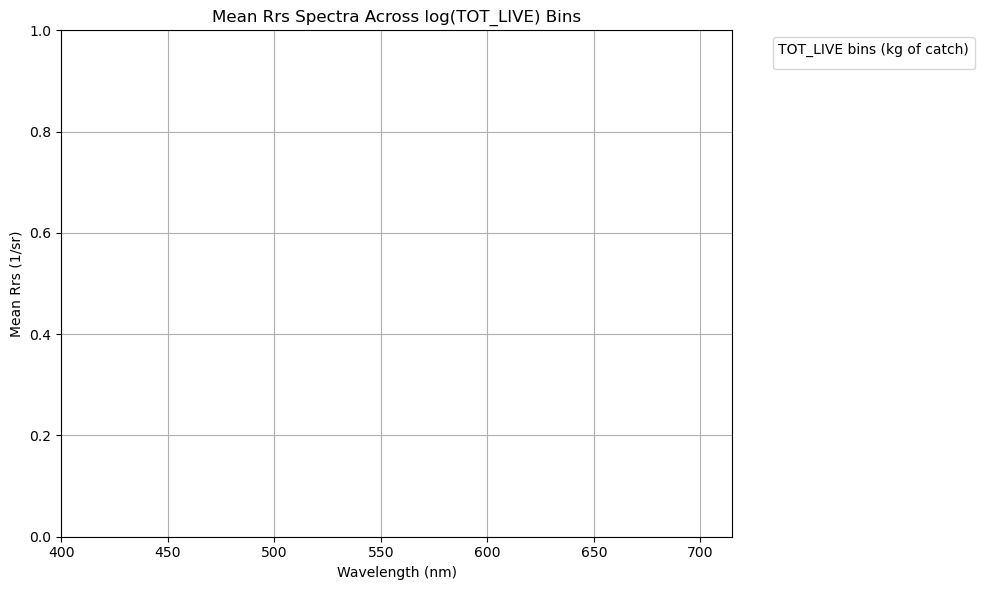

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define log-space bins
safe_tot = tot_live.clip(lower=1e-6) #this avoids issues with zeros
num_bins = 10
bins_log = np.logspace(np.log10(safe_tot.min()), np.log10(safe_tot.max()), num_bins + 1)
df2["bin_log"] = pd.cut(safe_tot, bins_log, include_lowest=True)

# Compute mean spectra per bin
mean_spectra = df2.groupby("bin_log", observed=True)[rrs_cols].mean().dropna(how="all")

# Plot
cmap = plt.colormaps.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(mean_spectra)))
plt.figure(figsize=(10,6))

for (bin_interval, row), color in zip(mean_spectra.iterrows(), colors):
    label = f"{bin_interval.left:.2f}-{bin_interval.right:.2f}"
    plt.plot(wavelengths, row.values, color=color, linewidth=2, label=label)

plt.xlabel("Wavelength (nm)")
plt.xlim(400, 715)
plt.ylabel("Mean Rrs (1/sr)")
plt.title("Mean Rrs Spectra Across log(TOT_LIVE) Bins")
plt.legend(title="TOT_LIVE bins (kg of catch)", bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()